# Boba Maps of NYC

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from PIL import Image

In [2]:
df = pd.read_csv('boba-nyc.csv')
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['pickup', 'delivery']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['pickup', 'delivery']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['pickup', 'delivery']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['pickup', 'delivery']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,60,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['pickup', 'delivery']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)


In [3]:
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,414.000000,414.000000,3.620000e+02,414.000000,414.000000,414.000000
mean,89.722222,3.985507,1.613962e+10,8980.359386,40.716170,-73.941997
std,116.765312,0.608481,2.375761e+09,5684.076763,0.058255,0.084129
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,16.250000,3.500000,1.347732e+10,3954.891025,40.689505,-73.994920
50%,49.000000,4.000000,1.718286e+10,8254.243639,40.731610,-73.975096
75%,109.000000,4.500000,1.718886e+10,13019.588280,40.757300,-73.880179
max,740.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [4]:
df.describe(include=['O']).T

,count,unique,top,freq
id,414,414,Q3fmTHT7zilDWtfzLK9lMA,1
alias,414,414,truedan-new-york-3,1
name,414,259,Kung Fu Tea,26
image_url,409,409,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,1
url,414,414,https://www.yelp.com/biz/truedan-new-york-3?ad...,1
categories,414,177,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",115
coordinates,414,409,"{'latitude': 40.71697, 'longitude': -73.99471}",2
transactions,414,5,"['pickup', 'delivery']",229
price,258,3,$,166
location,414,411,"{'address1': '90-15 Queens Blvd', 'address2': ...",2


### Map Boba data for NYC neighborhoods

In [5]:
# read neighborhood data as geodataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)
neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [6]:
# re-project neighborhood data
neighborhoods.to_crs(epsg=4326)

# open the boba dataframe as geo data frame using the lat-long info in the data
gdf = gpd.GeoDataFrame(df, crs=neighborhoods.crs, geometry=gpd.points_from_xy(df.longitude, df.latitude))

print(neighborhoods.crs)
print(gdf.crs)

GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [7]:
# join the neighborhood information to each boba shop
join_df = gpd.sjoin(gdf, neighborhoods, how="left")
print(join_df.shape)
join_df.head()

(414, 27)


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,-73.996220,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,-73.997100,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,-73.984539,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}",...,-73.987750,POINT (-73.98775 40.72880),139,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,60,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}",...,-73.989191,POINT (-73.98919 40.73552),32,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891148


In [8]:
# get the counts of boba shops groupped by neighborhood names

group_nt = join_df.groupby(by='ntaname')['id'].count().sort_values(ascending=True)
group_nt = group_nt.reset_index()
group_nt.columns = ['ntaname', 'counts']
group_nt.head()
group_nt.describe()

,counts
count,93.000000
mean,4.451613
std,6.289253
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,40.000000


In [9]:
# get the average ratings of boba shops groupped by neighborhood names

nt_rating = join_df.groupby(by='ntaname')['rating'].mean().sort_values(ascending=True)
nt_rating = nt_rating.reset_index()
nt_rating.columns = ['ntaname','rating']
nt_rating.describe()
# nt_rating.head()

,rating
count,93.000000
mean,4.018089
std,0.472595
min,2.000000
25%,3.833333
50%,4.000000
75%,4.333333
max,5.000000


In [10]:
# merge the counts by neighborhood dataframe and ratings by neighborhood dataframe
group_nt = group_nt.merge(nt_rating, how="left", left_on='ntaname', right_on='ntaname')
group_nt.head()

,ntaname,counts,rating
0,Manhattanville,1,4.5
1,Greenpoint,1,4.0
2,Homecrest,1,4.5
3,Jackson Heights,1,4.0
4,Kew Gardens,1,4.5


In [11]:
# merge the counts and ratings by neighborhood dataframe with the neighborhood geodataframe to get the spatial information
group_nt_gdf = neighborhoods.merge(group_nt, how='left', left_on='ntaname', right_on='ntaname')
group_nt_gdf.describe()

,boro_code,shape_area,shape_leng,counts,rating
count,195.000000,1.950000e+02,195.000000,93.000000,93.000000
mean,3.000000,4.318885e+07,41951.159527,4.451613,4.018089
std,1.218415,4.444240e+07,48318.180831,6.289253,0.472595
min,1.000000,5.582695e+06,12021.209965,1.000000,2.000000
25%,2.000000,1.938190e+07,23823.525753,1.000000,3.833333
50%,3.000000,3.262979e+07,30603.715250,2.000000,4.000000
75%,4.000000,5.018478e+07,41719.052553,5.000000,4.333333
max,5.000000,3.271987e+08,485889.330514,40.000000,5.000000


In [12]:
# get the lat-long of the centroid of each neighborhood ("label_geometry") for labeling
group_nt_gdf['label_geometry'] = group_nt_gdf['geometry'].centroid
group_nt_gdf.sort_values('counts', ascending=True)
group_nt_gdf.head()

C:\Users\datal\AppData\Local\Temp\ipykernel_15288\2953681496.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  group_nt_gdf['label_geometry'] = group_nt_gdf['geometry'].centroid


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,label_geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",4.0,4.250000,POINT (-73.80955 40.76835)
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",NaN,NaN,POINT (-73.86840 40.76335)
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",5.0,4.000000,POINT (-73.78372 40.73489)
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",15.0,3.833333,POINT (-73.98350 40.75573)
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",NaN,NaN,POINT (-73.85619 40.81805)


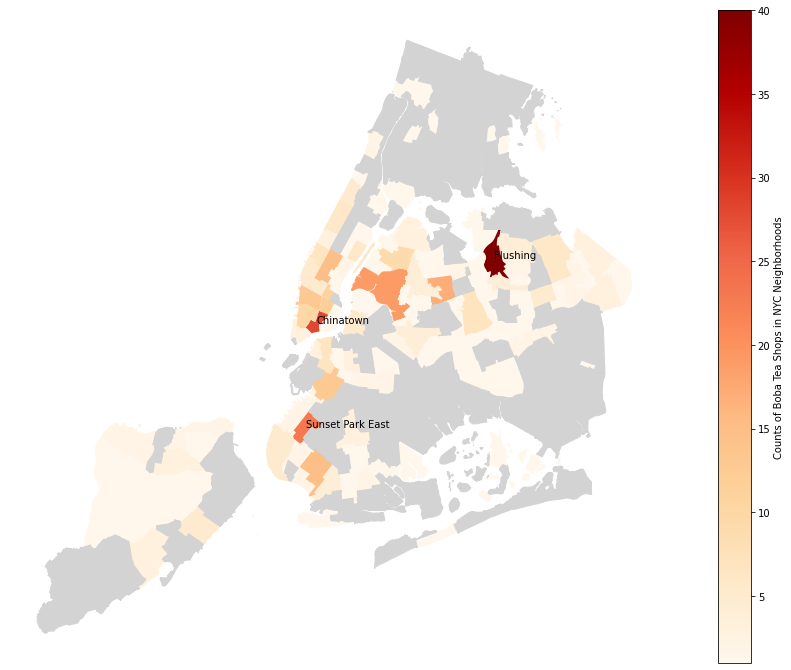

In [13]:
# create a choropleth map of boba shop counts in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12), sharey=False)
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(ax=ax, column='counts', cmap='OrRd', edgecolor="none", linewidth=1, legend=True, legend_kwds = {'label': "Counts of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

top_counts = group_nt_gdf.sort_values("counts", ascending=False)[0:3]
for x, y, label in zip(top_counts.label_geometry.x, top_counts.label_geometry.y, top_counts.ntaname):
    ax.annotate(label, xy=(x, y))

ax.set_axis_off()

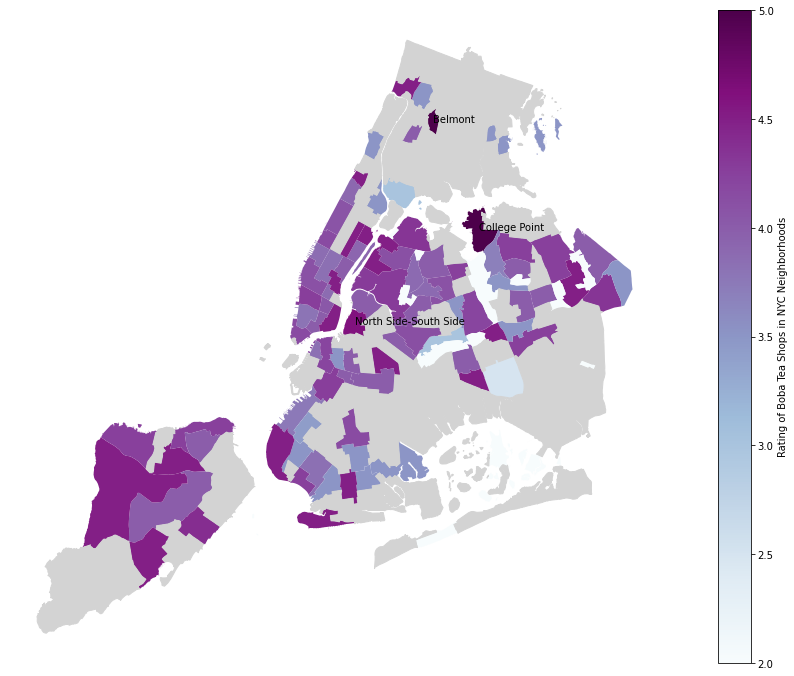

In [14]:
# create a choropleth map of average boba shop ratings in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12), sharey=False)

missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax, column='rating', cmap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Rating of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

top_rated = group_nt_gdf.sort_values("rating", ascending=False)[0:3]
for x, y, label in zip(top_rated.label_geometry.x, top_rated.label_geometry.y, top_rated.ntaname):
    ax.annotate(label, xy=(x, y))
ax.set_axis_off()

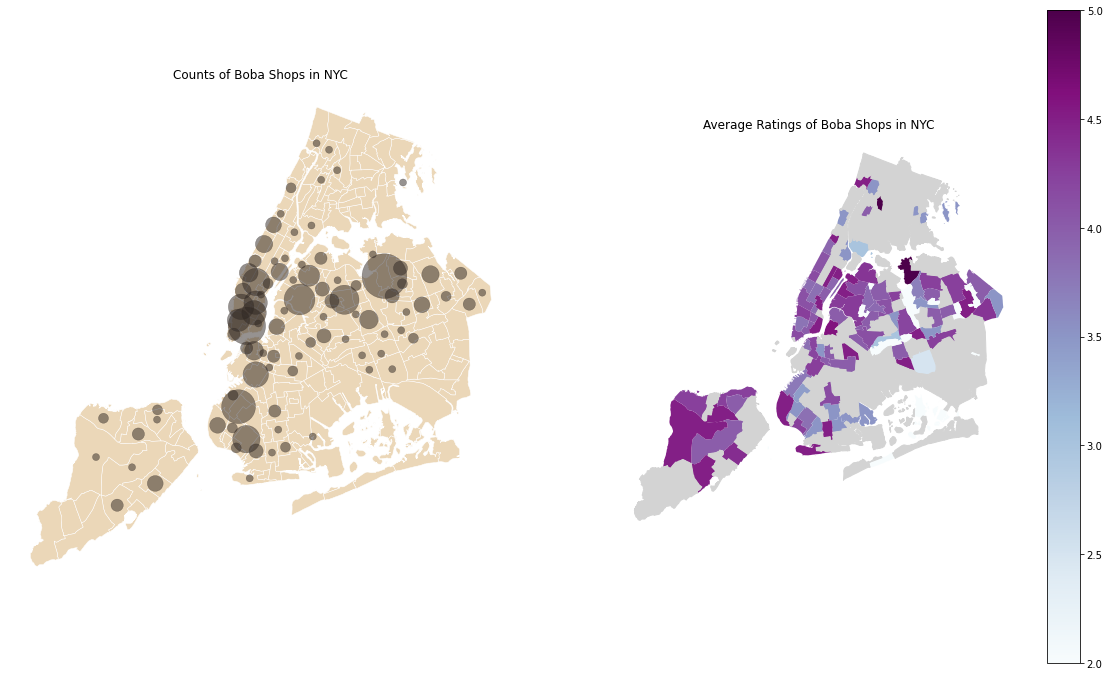

In [15]:
# create a choropleth map of boba shop ratings in NYC neighborhoods
# and a proportional symbol map of boba shop counts in NYC neighborhoods

fig, ax = plt.subplots(1,2, figsize=(20, 12), sharey=False)


# draw counts of boba tea shops
group_nt_gdf_pt = group_nt_gdf.copy()
group_nt_gdf_pt['geometry'] = group_nt_gdf_pt['label_geometry']
group_nt_gdf_pt.head()

ax[0].title.set_text('Counts of Boba Shops in NYC')
neighborhoods.plot(ax=ax[0], color="#ebd7b8", edgecolor="white",linewidth=0.5, alpha=1) #gainsboro
group_nt_gdf_pt.plot(ax=ax[0], color="#2e2622", markersize=group_nt_gdf_pt.counts * 50, alpha=0.5, edgecolor='#2e2622', linewidth=0.4, legend=True, legend_kwds = {'label': "Counts of Boba Tea Shops in NYC Neighborhoods"})


# draw average rating of boba tea shops
ax[1].title.set_text('Average Ratings of Boba Shops in NYC')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax[1], column='rating', cmap='BuPu', edgecolor="none", linewidth=1, legend=True, missing_kwds=missing_kwds)

ax[0].set_axis_off()
ax[1].set_axis_off()